# Clasificador de imágenes con transfer learning
Vamos a diferenciar entre cuchara, cuchillo y tenedor con un dataset
con pocas imágenes. Si tenemos pocas imágenes para entyrenar la IA podemos
tener overfiting, que es que la ia se aprende los datos de entrenamiento
muy bien, pero luego falla mucho en las predicciones. Con transfer learning
aprovechamos un modelo ya entrenado y simplemente le enseñamos a distinguir lo que  nosotros queramos. En esta ocasión usaremos un modelo llamado MOBILENET_V2. Que es una red convolucional desarrollada por Google que fue entrenada con un set de datos gigantesco llamado imageNet, que contiene más de 10 millones de imágenes clasificadas. Está optimizada para trabajar con pocos recirsos. La modificaremos para adaptarla al proyecto. Está configurada para trabajar con imagenes de 224x224 px a color, es decir, con tres canales. La salida es una capa de clasificacion con 1001 neuronas, aunque esta capa la modificaremos, quitandole y añadiendole una nueva con tres neuronas de salida; cuchillo, tenedor y cuchara. Laúltima parte es la que hay que entrenar. Congelamos los parámetros del restod e capas para conservar sus pesos y sesgos y solo entrenaremos la última capa. Las primeras capas son capaces de "Ver" y diferenciar entre colores, texturas y formas y la última capa que añadiremos será la que haga que la red sepa diferenciar entre los distintos cubiertos.

Una técnica que se usa, creo que es fine tuning, es entrenar la última capa y luego entrenar de nuevo toda la red completa con ajustes pequeños con los pesos y los sesgos ya establecidos para mejorar la precisión.


In [2]:
#Crear las carpetas para subir las imagenes
!mkdir cuchillos
!mkdir cucharas
!mkdir tenedores

In [5]:
#Entrar en cada carpeta y descomprimir el archivo zip
import os
import rarfile

# Especificar la ruta de UnRAR si no está en variables de entorno (opcional)
rarfile.UNRAR_TOOL = r"C:\Program Files\WinRAR\UnRAR.exe"  # Ajusta esta ruta si es necesario

# Lista de carpetas que contienen los archivos RAR
folders = ["cuchillos", "tenedores", "cucharas"]

for folder in folders:
    folder_path = os.path.join(os.getcwd(), folder)
    rar_path = os.path.join(folder_path, f"{folder}.rar")

    if os.path.exists(rar_path):  # Verificar si el archivo RAR existe
        with rarfile.RarFile(rar_path, 'r') as rar_ref:
            rar_ref.extractall(folder_path)  # Extraer en la misma carpeta
        print(f"Descomprimido: {rar_path}")
    else:
        print(f"No se encontró: {rar_path}")

Descomprimido: c:\Users\dekad\Desktop\GrupoStudium\3. Segundo DAM\7. Proyecto integrado\Espacio de trabajo\cuchillos\cuchillos.rar
Descomprimido: c:\Users\dekad\Desktop\GrupoStudium\3. Segundo DAM\7. Proyecto integrado\Espacio de trabajo\tenedores\tenedores.rar
Descomprimido: c:\Users\dekad\Desktop\GrupoStudium\3. Segundo DAM\7. Proyecto integrado\Espacio de trabajo\cucharas\cucharas.rar


In [6]:
#Borrar los archivo ZIP
!rm -rf /content/cucharas/cucharas.zip
!rm -rf /content/cuchillos/cuchillos.zip
!rm -rf /content/tenedores/tenedores.zip

"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [33]:
import os

# Lista de carpetas donde están las imágenes
folders = ["cucharas", "cuchillos", "tenedores"]

# Contar archivos en cada carpeta
for folder in folders:
    folder_path = os.path.join(os.getcwd(), folder)  # Ruta completa
    if os.path.exists(folder_path):  # Verificar si la carpeta existe
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"📂 {folder}: {num_files} imágenes")
    else:
        print(f"⚠️ La carpeta {folder} no existe")


📂 cucharas: 351 imágenes
📂 cuchillos: 662 imágenes
📂 tenedores: 342 imágenes


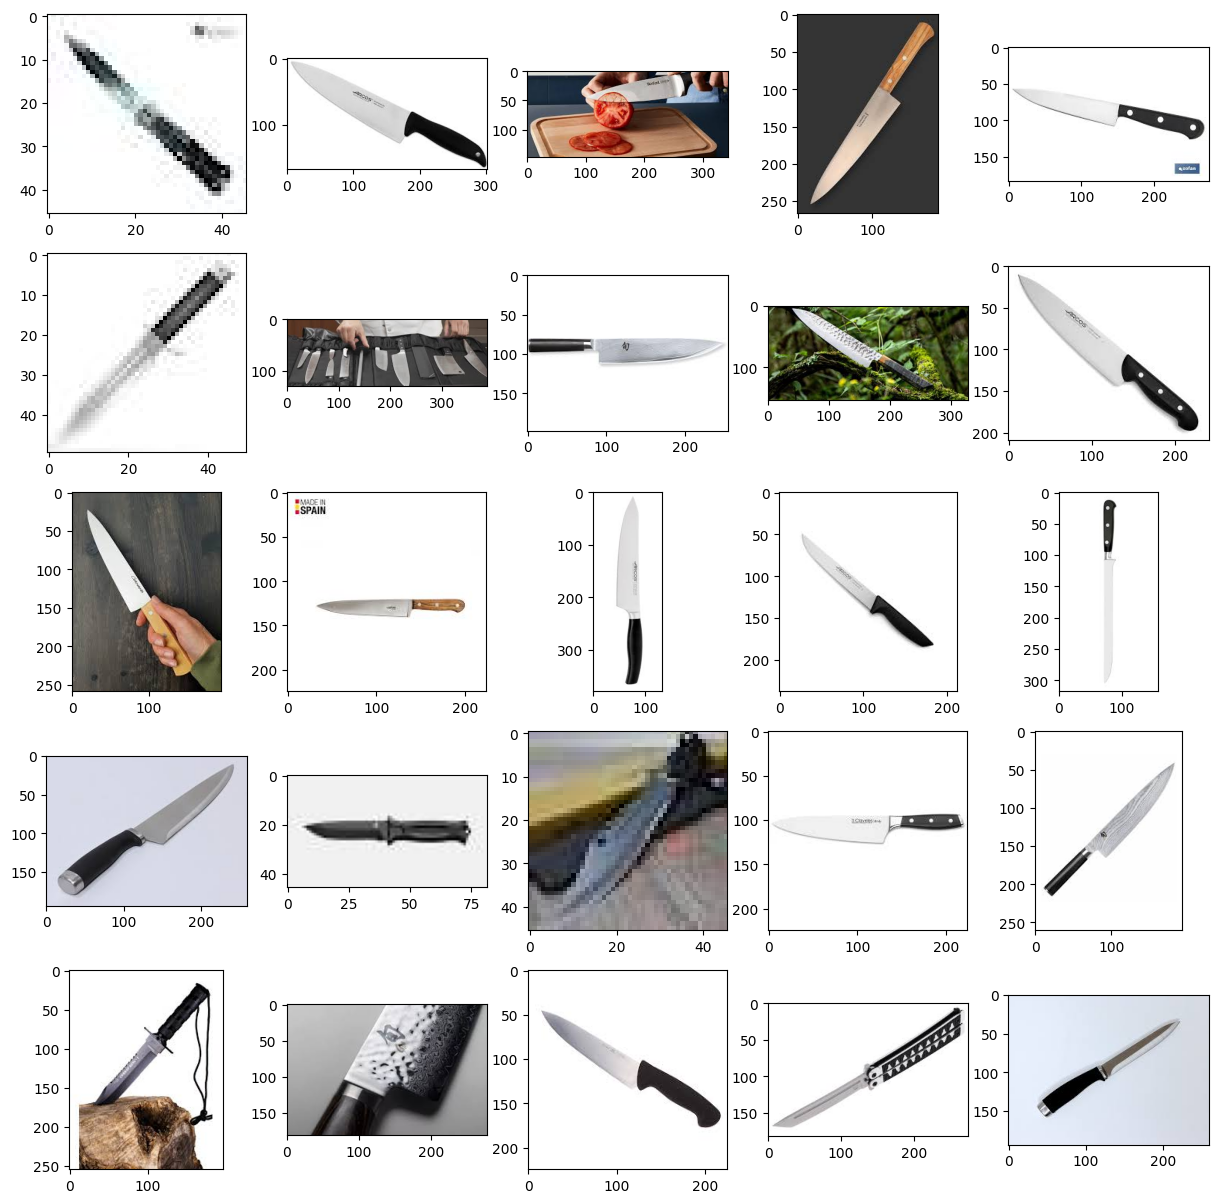

In [34]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = 'cuchillos'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [3]:
#Crear carpetas para hacer el set de datos

import os

# Definir las carpetas a crear
base_folder = "dataset"
categories = ["cuchillo", "tenedor", "cuchara"]

# Crear la carpeta principal si no existe
if not os.path.exists(base_folder):
    os.makedirs(base_folder)
    print(f"📂 Carpeta creada: {base_folder}")
else:
    print(f"⚠️ La carpeta {base_folder} ya existe")

# Crear las subcarpetas para cada categoría
for category in categories:
    category_path = os.path.join(base_folder, category)
    if not os.path.exists(category_path):
        os.makedirs(category_path)
        print(f"📂 Subcarpeta creada: {category_path}")
    else:
        print(f"⚠️ La subcarpeta {category_path} ya existe")

📂 Carpeta creada: dataset
📂 Subcarpeta creada: dataset\cuchillo
📂 Subcarpeta creada: dataset\tenedor
📂 Subcarpeta creada: dataset\cuchara


In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 387 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = 'cuchillos'
carpeta_destino = 'dataset/cuchillo'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 342:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [5]:
carpeta_fuente = 'tenedores'
carpeta_destino = 'dataset/tenedor'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 342:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [6]:
carpeta_fuente = 'cucharas'
carpeta_destino = 'dataset/cuchara'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 342:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [12]:
# Lista de carpetas donde están las imágenes
folders = ["dataset/cuchara", "dataset/cuchillo", "dataset/tenedor"]

# Contar archivos en cada carpeta
for folder in folders:
    folder_path = os.path.join(os.getcwd(), folder)  # Ruta completa
    if os.path.exists(folder_path):  # Verificar si la carpeta existe
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"📂 {folder}: {num_files} imágenes")
    else:
        print(f"⚠️ La carpeta {folder} no existe")

📂 dataset/cuchara: 342 imágenes
📂 dataset/cuchillo: 342 imágenes
📂 dataset/tenedor: 342 imágenes


Found 822 images belonging to 3 classes.
Found 204 images belonging to 3 classes.


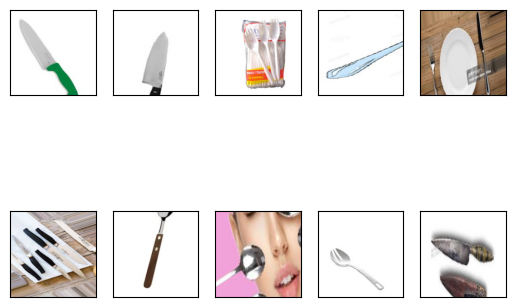

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


In [2]:
# Importaciones necesarias para usar Keras con TensorFlow 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Aquí van el resto de las importaciones necesarias para tu proyecto
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

# Cargar MobileNetV2 como modelo base (sin usar TensorFlow Hub)
mobilenetv2_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [3]:
# Congelar las primeras capas del modelo base
mobilenetv2_base.trainable = False

In [4]:
# Crear un modelo de la red con MobileNetV2 como base
modelo = Sequential([
    mobilenetv2_base,
    GlobalAveragePooling2D(),
    Dense(3, activation='softmax')  # Nueva capa de salida
])

In [5]:
# Resumen del modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [6]:
# Compilar el modelo utilizando la API de optimizadores de TensorFlow 2.x
modelo.compile(
    optimizer=Adam(learning_rate=0.0001),  # Ajuste de la tasa de aprendizaje para fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine tuning
Desbloquear las últimas capas del modelo preentrenado.

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear generadores de datos para entrenamiento y validación
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% de las imágenes serán de validación
)

# Directorio con las imágenes
ruta_datos = "dataset"

# Generador para entrenamiento
data_gen_entrenamiento = datagen.flow_from_directory(
    ruta_datos,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Generador para validación
data_gen_pruebas = datagen.flow_from_directory(
    ruta_datos,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 822 images belonging to 3 classes.
Found 204 images belonging to 3 classes.


In [8]:
# Fine-Tuning: Desbloquear las últimas capas de MobileNetV2
for layer in mobilenetv2_base.layers[-10:]:  # Ajustar el número de capas según el modelo
    layer.trainable = True

# Volver a compilar el modelo después de habilitar el fine-tuning
modelo.compile(
    optimizer=Adam(learning_rate=0.0001),  # Ajustar la tasa de aprendizaje para fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
EPOCAS = 50
historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS,
    validation_data=data_gen_pruebas
)

Epoch 1/50
26/26 [==============================] - 26s 807ms/step - loss: 1.3690 - accuracy: 0.2409 - val_loss: 1.4832 - val_accuracy: 0.2353
Epoch 2/50
26/26 [==============================] - 24s 912ms/step - loss: 1.2029 - accuracy: 0.3394 - val_loss: 1.3024 - val_accuracy: 0.3137
Epoch 3/50
26/26 [==============================] - 25s 944ms/step - loss: 1.1028 - accuracy: 0.4112 - val_loss: 1.2302 - val_accuracy: 0.4020
Epoch 4/50
26/26 [==============================] - 25s 942ms/step - loss: 0.9997 - accuracy: 0.5182 - val_loss: 1.0857 - val_accuracy: 0.4706
Epoch 5/50
26/26 [==============================] - 25s 969ms/step - loss: 0.9253 - accuracy: 0.5718 - val_loss: 0.9810 - val_accuracy: 0.5343
Epoch 6/50
26/26 [==============================] - 26s 996ms/step - loss: 0.8606 - accuracy: 0.6107 - val_loss: 0.9366 - val_accuracy: 0.5392
Epoch 7/50
26/26 [==============================] - 26s 1s/step - loss: 0.7927 - accuracy: 0.6582 - val_loss: 0.8771 - val_accuracy: 0.5882
Ep

acc = [0.24087591469287872, 0.3394160568714142, 0.4111922085285187, 0.5182482004165649, 0.5717761516571045, 0.6107056140899658, 0.658150851726532, 0.7153284549713135, 0.7201946377754211, 0.7506082653999329, 0.7579075694084167, 0.7749391794204712, 0.7700729966163635, 0.7907542586326599, 0.7883211970329285, 0.7883211970329285, 0.7907542586326599, 0.8236009478569031, 0.7944039106369019, 0.8199513554573059, 0.8187347650527954, 0.8248175382614136, 0.8296837210655212, 0.8357664346694946, 0.8211678862571716, 0.841849148273468, 0.8467153310775757, 0.841849148273468, 0.8503649830818176, 0.8479318618774414, 0.8284671306610107, 0.8515815138816833, 0.8576642274856567, 0.8406326174736023, 0.8588807582855225, 0.8527980446815491, 0.841849148273468, 0.8406326174736023, 0.8479318618774414, 0.8686131238937378, 0.8673965930938721, 0.8491483926773071, 0.8673965930938721, 0.8588807582855225, 0.8795620203018188, 0.8686131238937378, 0.8686131238937378, 0.8576642274856567, 0.8734793066978455, 0.86374694108963

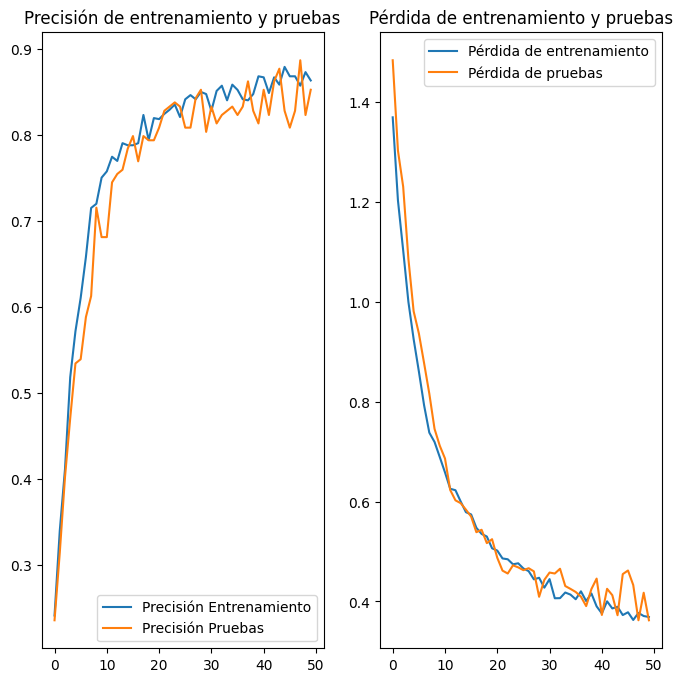

In [9]:
import os
import matplotlib.pyplot as plt
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

print('acc = ' + str(acc) + ', val_acc = ' + str(val_acc) + ', loss = ' + str(loss) + ', val_loss = ' + str(val_loss))

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [19]:
import requests
import numpy as np
import cv2
from io import BytesIO

def categorizar(url):
    respuesta = requests.get(url)
    img_array = np.array(bytearray(respuesta.content), dtype=np.uint8)
    img = cv2.imdecode(img_array, -1)
    
    # Procesar la imagen
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB si es necesario
    img = cv2.resize(img, (224, 224))
    img = img.astype(float) / 255.0
    prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
    return np.argmax(prediccion[0], axis=-1)

In [ ]:
import numpy as np
#0 = cuchara, 1 = cuchillo, 2 = tenedor
url = 'https://cdn-icons-png.flaticon.com/512/3074/3074535.png' #debe ser 2
prediccion = categorizar (url)
print(prediccion)